In [17]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [18]:
df = pd.read_csv('path.csv')

df['x'] = (df[' distance / mm'] * np.sin(df[' angle / °'] * np.pi/180)).cumsum()
df['y'] = (df[' distance / mm'] * np.cos(df[' angle / °'] * np.pi/180)).cumsum()

df

,time / s,distance / mm,angle / °,x,y
0,0.000,0.000,0,0.000000,0.000000
1,23.548,2.351,0,0.000000,2.351000
2,26.555,-0.050,0,0.000000,2.301000
3,35.299,0.644,124,0.533900,1.940880
4,38.306,-0.050,124,0.492448,1.968839
5,54.937,1.456,224,-0.518974,0.921481
6,57.946,-0.050,224,-0.484241,0.957448
7,70.567,1.009,371,-0.291715,1.947909
8,73.575,-0.050,371,-0.301256,1.898828
9,92.797,1.659,528,0.043670,0.276081


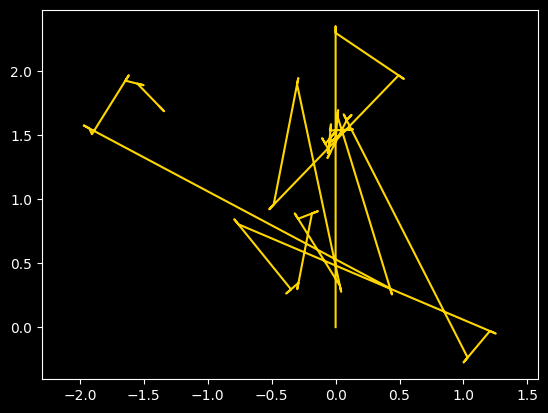

In [19]:
plt.style.use('dark_background')
plt.plot(df['x'],df['y'], color='gold')
plt.axis('equal')

# plt.savefig('path.png', transparent=True)